# **Colour Identification in Images**

**Bala Vasavi Seshanjali Kancharla**

**Computer Vision and IOT Intern at The Sparks Foundation**

*IMPORTING THE REQUIRED LIBRARIES*

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab , deltaE_cie76
import os
from IPython.display import set_matplotlib_formats
%matplotlib inline

*READING THE IMAGE*

The type of this input is <class 'numpy.ndarray'>
Shape: (384, 654, 3)


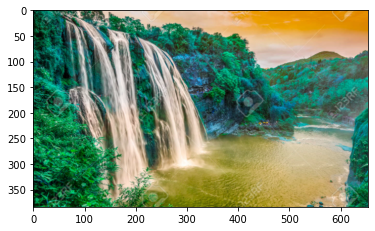

In [6]:
image = cv2.imread('/content/scenery.PNG')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

The colour of the image looks a bit off. This is because by default, OpenCV reads image in the sequence Blue Green Red (BGR)

Thus to view the actual image, we need to convert the rendering to Red Green Blue (RGB)

*REPRESENTED IMAGE AS A COMBINATION OF THREE COLOURS : RED,GREEN AND BLUE*

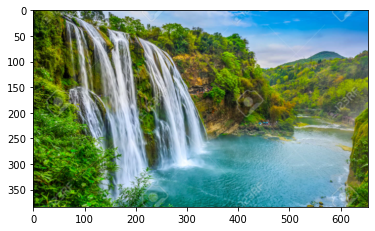

In [7]:
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)

#**Colour Identification**

*RGB TO HEX CONVERSION*

In [8]:
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

*READ IMAGE IN RGB COLOUR SPACE*

In [9]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

*GET COLOURS FROM AN IMAGE*

In [11]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

# **Algorithm :**

*KMEANS ALGORITHM*

*IMPLEMENT KMEANS ALGORITHM TO GET NUMBER OF COLOURS*

In [12]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(modified_image)

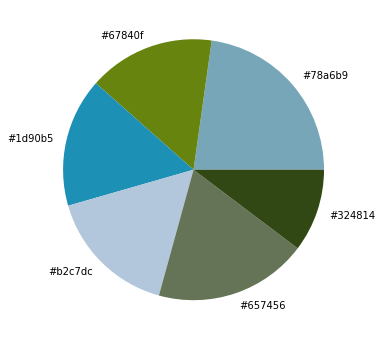

In [14]:
counts = Counter(labels)

center_colors = clf.cluster_centers_

# we get ordered colours by iterating through the keys

ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (6):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)